<a href="https://colab.research.google.com/github/VladousSparrowous/HSE-homeworks/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B3%D0%B0%D1%83%D1%81%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B_%D0%BD%D0%B0_Python%2C_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

мини-курса «[Введение в гауссовские процессы на Python](https://csspace.io/course/2025fall-gaussian-process)»

Рассмотрим супер простой датасет

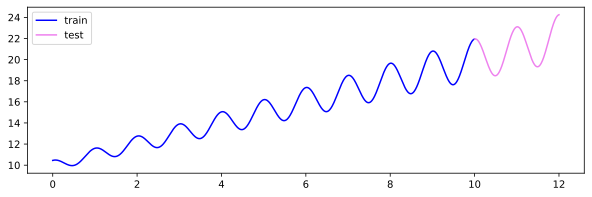

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

t_train = np.linspace(0, 10, 1000)
t_test = np.linspace(10, 12, 200)

y_train = 10 + t_train + 0.15 * (t_train + 3) * np.cos(2 * np.pi * t_train)
y_test = 10 + t_test + 0.15 * (t_test + 3) * np.cos(2 * np.pi * t_test)

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.legend()
plt.show()

В следующих нескольких шагам мы посмотрим, насколько хорошо нам удастся предсказывать тестовую часть по обучающей с помощью гауссовских процессов в зависимости от вида ковариационной функции.

В качестве метрики качества у нас будет среднеквадратичная ошибка:

$$ RMSE = \sqrt{\frac 1n \sum_{i=1}^n (y_i - \hat{y}_i)^2}, $$

где $y$ это то, что предсказываем, а $\hat{y}$ это то, чем предсказываем.

Построить предсказание можно с помощью следующего кода, который реализует подсчет условного матожидания:

In [2]:
def K(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    return 10 * np.ones_like(s * t)

K_y = K(t_test, t_test)
K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))  # второе слагаемое, чтобы не было проблем с обратимостью матрицы
K_yx = K(t_test, t_train)

y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

А нарисовать график как-то так:

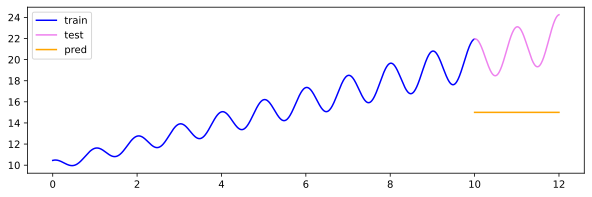

In [3]:
plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()

## 1

Постройте предсказание и его график для $K(s, t) = st$. Объясните увиденное. В качестве ответа выведите RMSE.

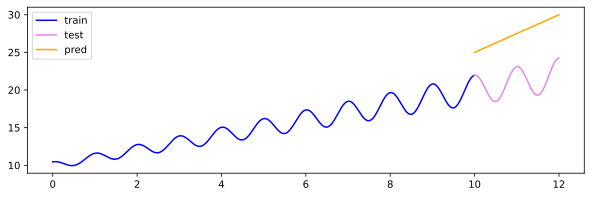

6.710663504683944


In [8]:
def K(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    return s * t

K_y = K(t_test, t_test)
K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))
K_yx = K(t_test, t_train)

y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()
print(np.mean((y_pred - y_test) ** 2) ** (1 / 2))

## 2

Постройте предсказание и его график для $K(s, t) = 1 + st$. Объясните увиденное. В качестве ответа выведите RMSE.

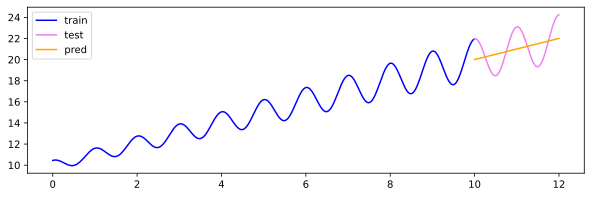

1.4899261784387283


In [22]:
def K(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    return 1 + s * t

K_y = K(t_test, t_test)
K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))
K_yx = K(t_test, t_train)

y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()
print(np.mean((y_pred - y_test) ** 2) ** (1 / 2) )

## 3

Постройте предсказание и его график для $K(s, t) = 1 + st + e^{-\sin(2\pi|s - t|)^2}$. Объясните увиденное. Почему ковариационная функция, которая легко порождает всякие синусоиды, не вывозит? В качестве ответа выведите RMSE.

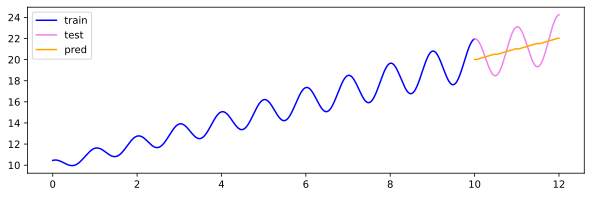

1.4896260213039458


In [41]:
def K(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    r = np.sin((2 * np.pi * np.abs(s - t))) ** 2
    return 1 + s * t + np.exp(-r)

K_y = K(t_test, t_test)
K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))
K_yx = K(t_test, t_train)

y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()
print(np.mean((y_pred - y_test) ** 2) ** (1 / 2) )

## 4

Постройте предсказание и его график для $K(s, t) = 1 + st + e^{-\sin(\pi|s - t|)^2}$. Объясните увиденное. Почему теперь все хорошо? В качестве ответа выведите RMSE.

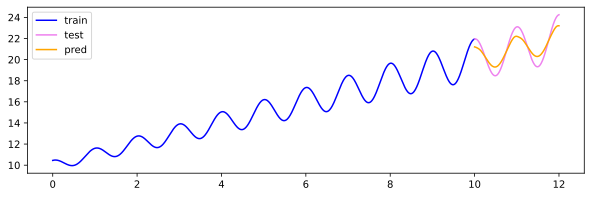

0.6403880355310844


In [42]:
def K(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    r = np.sin((np.pi * np.abs(s - t))) ** 2
    return 1 + s * t + np.exp(-r)

K_y = K(t_test, t_test)
K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))
K_yx = K(t_test, t_train)

y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()
print(np.mean((y_pred - y_test) ** 2) ** (1 / 2) )

## 5

Постройте предсказание и его график для
$$K(s, t) = 1 + st + e^{-|s - t|^2 / \ell^2} \cdot e^{-\sin(\pi|s - t|)^2}$$
для $\ell = 10, 1, 0.1$. Объясните увиденное. В качестве ответа выведите RMSE для $\ell = 10$.

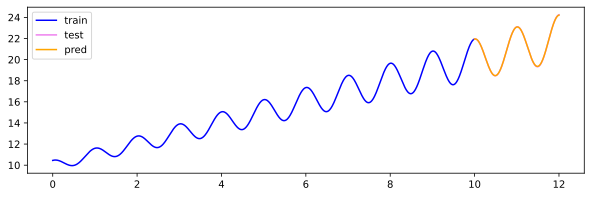

0.01637795400546947


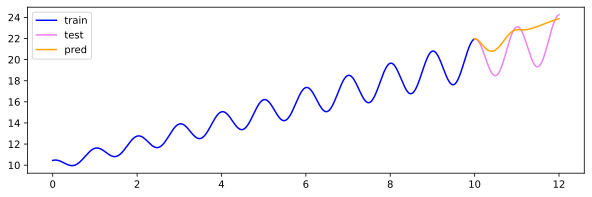

1.9023587348573432


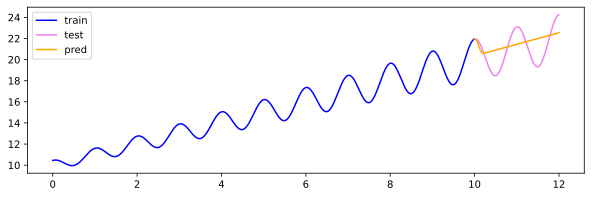

1.5102125438111131


In [44]:
def pred(l=1):
    def K(s, t):
        s = s.reshape(-1, 1)
        t = t.reshape(1, -1)
        r = np.sin((np.pi * np.abs(s - t))) ** 2
        m = ((s - t) / l) ** 2
        return 1 + s * t + np.exp(-(r + m))

    K_y = K(t_test, t_test)
    K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))
    K_yx = K(t_test, t_train)

    y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

    plt.figure(figsize=(10, 3))
    plt.plot(t_train, y_train, color='blue', label='train')
    plt.plot(t_test, y_test, color='violet', label='test')
    plt.plot(t_test, y_pred, color='orange', label='pred')
    plt.legend()
    plt.show()
    print(np.mean((y_pred - y_test) ** 2) ** (1 / 2) )
l_array = [10, 1, 0.1]
for l in l_array:
    pred(l)

## 6

Постройте предсказание и его график для $K(s, t) = 1 + st + st \cdot e^{-\sin(\pi|s - t|)^2}$, а потом для $K(s, t) = 1 + st + (1 + st) \cdot e^{-\sin(\pi|s - t|)^2}$. Объясните увиденное. В качестве ответа выведите RMSE для второго случая.

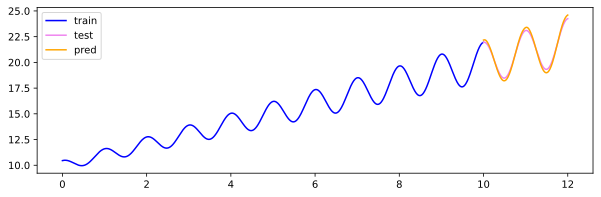

0.2089981071330573


In [45]:
def K(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    r = np.sin((np.pi * np.abs(s - t))) ** 2
    return 1 + s * t + s * t * np.exp(-r)

K_y = K(t_test, t_test)
K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))
K_yx = K(t_test, t_train)

y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()
print(np.mean((y_pred - y_test) ** 2) ** (1 / 2) )

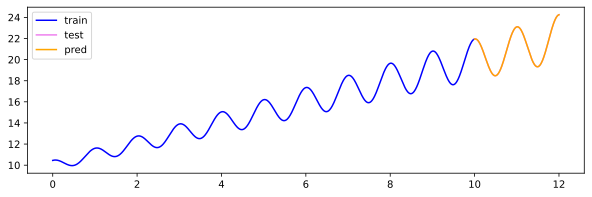

1.7414505430526287e-06


In [46]:
def K(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    r = np.sin((np.pi * np.abs(s - t))) ** 2
    return 1 + s * t + (1 + s * t) * np.exp(-r)

K_y = K(t_test, t_test)
K_x = K(t_train, t_train) + 0.0001 * np.eye(len(t_train))
K_yx = K(t_test, t_train)

y_pred = (0 + K_yx @ np.linalg.inv(K_x) @ y_train.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()
print(np.mean((y_pred - y_test) ** 2) ** (1 / 2) )

## 7

Рассмотрим другие данные:

In [61]:
t_train = np.linspace(0, 10, 1000)
t_test = np.linspace(10, 12, 200)

y_train = 10 + t_train + 0.15 * (10 * np.cos(t_train) + 15) * np.cos(2 * np.pi * t_train)
y_test = 10 + t_test + 0.15 * (10 * np.cos(t_test) + 15) * np.cos(2 * np.pi * t_test)

Напишите ковариационную функцию `K(s, t)`, которая обеспечит хорошее предсказание. В качестве ответа выведите RMSE. Задача будет засчитана, если RMSE будет меньше 0.001.

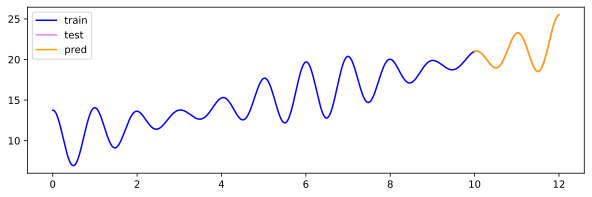

0.0015432014059828924


In [134]:
def K2(s, t):
    s = s.reshape(-1, 1)
    t = t.reshape(1, -1)
    r = (1 + np.cos(np.abs(s - t))) * np.sin((np.pi * np.abs(s - t))) ** 2
    return  1 + s * t + np.exp(-r)

K_y2 = K2(t_test, t_test)
K_x2 = K2(t_train, t_train) + 0.0001 * np.eye(len(t_train))
K_yx2 = K2(t_test, t_train)

y_pred = (0 + K_yx2 @ np.linalg.inv(K_x2) @ y_train.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 3))
plt.plot(t_train, y_train, color='blue', label='train')
plt.plot(t_test, y_test, color='violet', label='test')
plt.plot(t_test, y_pred, color='orange', label='pred')
plt.legend()
plt.show()
print(np.mean((y_pred - y_test) ** 2) ** (1 / 2) )